Hands-on exercise

This exercise is not graded and is intended to help you become familiar with the tools and libraries that you will be using throughout the rest of the course. If you are already experienced in using Google Colab, 🤗 Datasets, librosa and 🤗 Transformers, you may choose to skip this exercise.

- Create a Google Colab notebook.
- Use 🤗 Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.
- Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?
- Plot this example’s waveform and spectrogram.
- Go to 🤗 Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.
- Compare the transcription that you get from the pipeline to the transcription provided in the example.

If you struggle with this exercise, feel free to take a peek at an example solution. Discovered something interesting? Found a cool model? Got a beautiful spectrogram? Feel free to share your work and discoveries on Twitter!

In the next chapters you’ll learn more about various audio transformer architectures and will train your own model!

In [9]:
%pip install pip install torch torchvision torchaudio "datasets[audio]" gradio transformers

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install
Note: you may need to restart the kernel to use updated packages.


<iframe
  src="https://huggingface.co/datasets/facebook/voxpopuli/embed/viewer/cs/train"
  frameborder="0"
  width="100%"
  height="560px"
></iframe>

In [10]:
from datasets import load_dataset

voxpopuli_dataset = load_dataset("facebook/voxpopuli", "en", split="train", streaming=True)


## Plotting audio

In [11]:
example = next(iter(voxpopuli_dataset))
array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
import IPython.display as ipd
ipd.display(ipd.Audio(array, rate=sampling_rate))
example

{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17',
 'language': 0,
 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav',
  'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
         -0.00027466, -0.00018311], shape=(134399,)),
  'sampling_rate': 16000},
 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.',
 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.',
 'gender': 'female',
 'speaker_id': '124737',
 'is_gold_transcript': False,
 'accent': 'None'}

Text(101.22222222222221, 0.5, 'Amplitude')

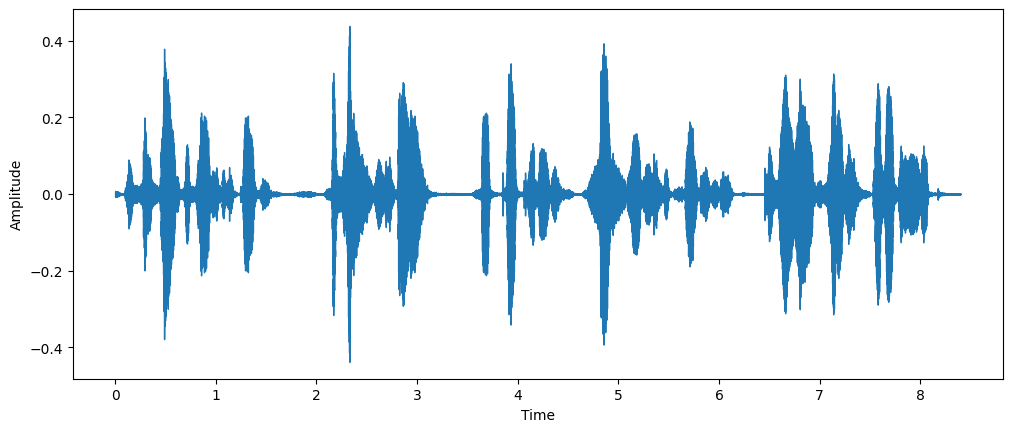

In [12]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.ylabel("Amplitude")

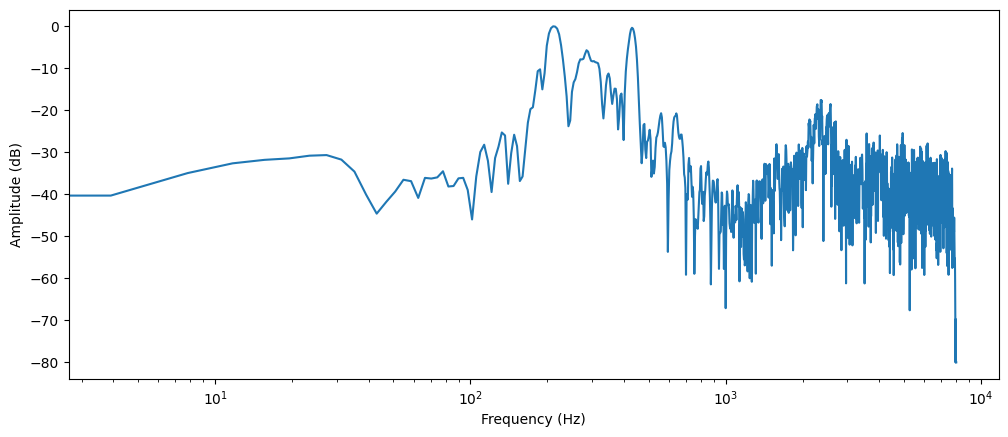

In [13]:
import numpy as np

sample_slice = 4096
dft_input = array[:sample_slice]

# Calculate the DFT
window = np.hanning(sample_slice)
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# Calculate the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# Calculate the frequency bins
frequency_bins = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency_bins, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")


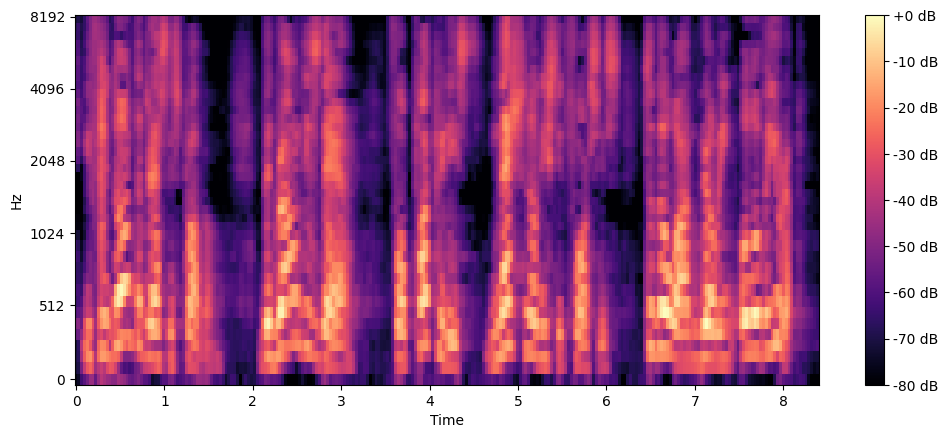

In [14]:
highest_frequency_of_interest = 8000

S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=40, fmax=highest_frequency_of_interest)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=highest_frequency_of_interest)
plt.colorbar(format="%+2.f dB")

## Transcribe the audio using a pretrained model


In [15]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [18]:
actual = example["normalized_text"]
output = asr(array)

print(f"Predicted: {output['text']}")
print(f"Actual: {actual}")


Predicted: IF YOU DON'T ADDRESS THIS PROBLEM THE GROUND IS THERE FOR POPULIST NATIONAL DISTIC FORCES TO GO ON GROWING ALL OVER EUROPE
Actual: if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.
